Enter a ticker (e.g. AAPL):  AAPL


/var/folders/nl/zjffygcx2qn096gb9h6bfyyc0000gn/T/ipykernel_1821/2643967328.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='1y')
[*********************100%***********************]  1 of 1 completed


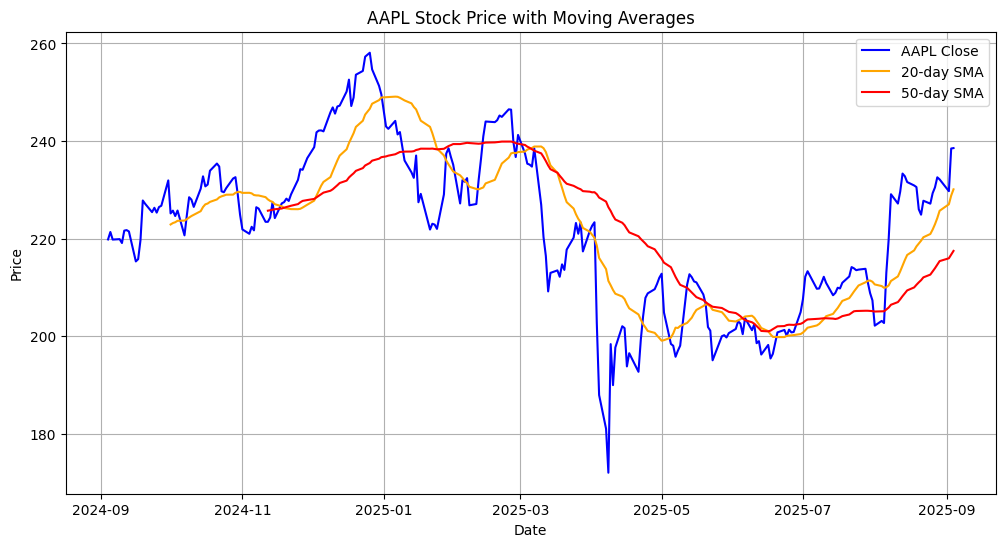


Basic statistics for AAPL:
Mean Return: 0.0005
Volatility (std): 0.0203
Max Price: Ticker
AAPL    258.103729
dtype: float64
Min Price: Ticker
AAPL    171.998978
dtype: float64

Data exported to AAPL_analysis.xlsx


In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def analyze_stock(ticker):
    """
    Download stock data, calculate basic statistics,
    moving averages, and visualize results.
    """
    # Download stock data (auto-adjusted prices, so we use 'Close')
    data = yf.download(ticker, period='1y')

    # Calculate daily returns (procentowa zmiana ceny dzień do dnia)
    data['Daily Return'] = data['Close'].pct_change() 

    # Calculate moving averages
    data['SMA20'] = data['Close'].rolling(window=20).mean()
    data['SMA50'] = data['Close'].rolling(window=50).mean()

    # Basic statistics
    stats = {
        'Mean Return': data['Daily Return'].mean(),
        'Volatility (std)': data['Daily Return'].std(),
        'Max Price': data['Close'].max(),
        'Min Price': data['Close'].min()
    }

    # ---- Plot price + moving averages ----
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label=f'{ticker} Close', color='blue')
    plt.plot(data['SMA20'], label='20-day SMA', color='orange')
    plt.plot(data['SMA50'], label='50-day SMA', color='red')

    plt.title(f'{ticker} Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return stats, data


# ---- Run single ticker analysis ----
ticker = input('Enter a ticker (e.g. AAPL): ').upper()
stats, data = analyze_stock(ticker)

# Print statistics
print(f'\nBasic statistics for {ticker}:')
for k, v in stats.items():
    print(f'{k}: {v:.4f}' if isinstance(v, float) else f'{k}: {v}')

# Save to Excel (unique file per ticker)
output_file = f'{ticker}_analysis.xlsx'
data.to_excel(output_file, sheet_name=ticker)
print(f'\nData exported to {output_file}')
